In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.integrate import odeint,quad
from scipy.stats import kde,beta
import seaborn as sns
%matplotlib inline
from importlib import reload
pi=np.pi

#mardi 31 mars 2020
#essayons tout d'abord d'écrire des fonctions qui calculent le rayon spectral
#et l'abcisse de convergence d'une matrice

from numpy import linalg as LA
from scipy.linalg import expm
from scipy.optimize import brentq


In [2]:
import ucovid
sns.set()

In [3]:
#reload(ucovid)
#ucovid.hesrog(beta=1,b=1,mu=1,r=1,eps=0.2)

 



In [25]:
#reload(ucovid)
#ucovid.lamvsp(beta=1.5,b=1,mu=0.9,r=1,epsmax=0.5)


In [ ]:
#reload(ucovid)
#ucovid.phesrog(beta=1,b=1,mu=2,r=0.5,voir=True,eps=0.1)

Pour le modèle de Hessterbeek et Rogers
\begin{equation}
  \frac{dx}{dt} = A(t) x(t)\qquad 
  A(t)=\begin{pmatrix}-r & b/s(t)\\
\beta s(t) & -\mu\end{pmatrix}
\end{equation}
avec $s(t) = e^{\epsilon \sin(2\pi t)}$. $\lambda_d(E)$ est le rayon spectral de ma matrice de monodromie $E=œphi(1)$, et $P$ leur quantité qui vérifient bien 
\begin{equation}
 R_0 > 1 \iff \lambda_d(E) >1 \iff P >1\,.
\end{equation}
On voit que contrairement à leur affirmation/prédiction les indicateurs augmentent quand $\epsilon$ augmente. En outre on voit que l'augmentation est en $\epsilon^2$ pour $\epsilon$ petit.

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(ucovid.lamvsp,
         beta=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
                b=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
                  mu=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
r=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
                  epsmax=widgets.FloatSlider(min=0.0, max=0.5, step=0.01, value=0.2, continuous_update=False)
        )



interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='beta', max=2.0), FloatSlide…

<function ucovid.lamvsp>

In [7]:
#ucovid.hesrog(beta=2.0,b=1.0,mu=1,r=1,eps=0.0)

1.5131802505966265

In [8]:
#ucovid.hesrog(beta=1,b=2.0,mu=1,r=1,eps=0.0)

1.5131802505966268

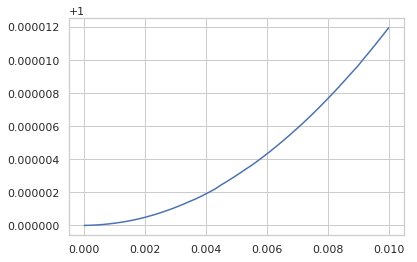

In [9]:
#reload(ucovid)
#ucovid.blamvsp(vlam=True,epsmax=0.01)

1.0302204550794536

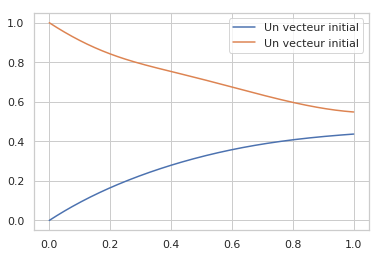

In [10]:
#reload(ucovid)
#ucovid.bhesrog(eps=0.5,voir=True)

I7/I2,I1,exp(eps*sin) 0.9999850643923525 -0.007604639952131169 1.0000002497502654


(1.1001486039235775, 1.199982077270823, 1.2006095672731398, 1.1999817775900015)

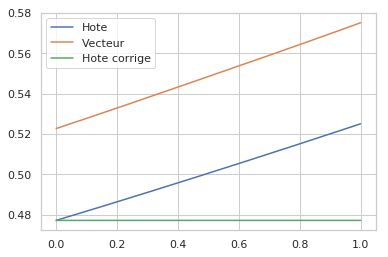

In [11]:
#reload(ucovid)
#ucovid.baphesrog(beta=1.2,eps=0.001,nbpts=1000,voir=True)

epsilon= 0.01 moyennes xz, yz 1.0000199005907962 0.9999950248756219
epsilon= 0.001 moyennes xz, yz 0.9999997512437345 0.9999995024875622


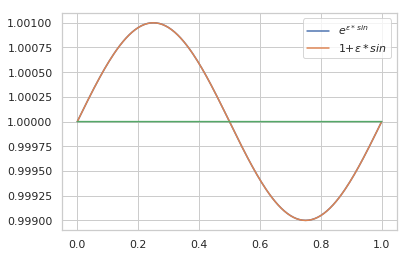

In [12]:
def testinfluencevecteurpropre():
    nbpts=200
    T=1
    eps=0.01
    tt=np.linspace(0,T,nbpts+1)
    stt=np.sin(2*pi*tt/T)
    x=np.exp(eps*stt)
    y=1+eps*stt
    z=1-0.001*stt
    print("epsilon=",eps,"moyennes xz, yz",(x*z).mean(),(y*z).mean()) #xz > 1 > yz
    eps=0.001
    x=np.exp(eps*stt)
    y=1+eps*stt
    z=1-0.001*stt
    print("epsilon=",eps,"moyennes xz, yz",(x*z).mean(),(y*z).mean()) #1> xz et 1 > yz
    plt.plot(tt,x,label=r"$e^{\epsilon*sin}$")
    plt.plot(tt,y,label=r"1+$\epsilon*sin$")
    plt.plot(tt,x*z)
    plt.legend()
#testinfluencevecteurpropre():

Mercredi 29 avril 2020. 

Essai de la dynamique proposée par Sylvain. On remplace $A(t)$ par
$$ B(t) =\begin{pmatrix}-r & b(1 + \delta \sin(2\pi t)\\
\beta(1-\delta \sin(2\pi t)) & -\mu\end{pmatrix}$$

avec comme paramètres typiques : $\beta=b=1.5$, $r=2$, $\mu=1$.
     

In [21]:
reload(ucovid)

<module 'ucovid' from '/home/philippe/pca/EPIDEMIE/ucovid.py'>

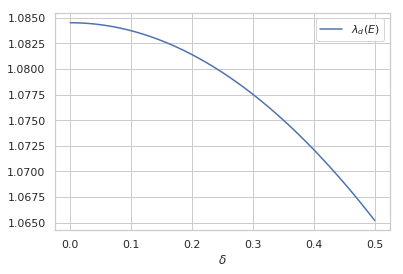

In [22]:
#ucovid.lamvsylvain()

In [24]:
interact(ucovid.lamvsylvain,
         beta=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.5, continuous_update=False),
                b=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.5, continuous_update=False),
                  mu=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=1.0, continuous_update=False),
r=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=2.0, continuous_update=False),
                  deltamax=widgets.FloatSlider(min=0.0, max=0.5, step=0.01, value=0.2, continuous_update=False)
        )



interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='beta', max=2.0), FloatSlide…

<function ucovid.lamvsylvain>

On voit que la l'indicateur $\lambda_d(E)$ décroît avec $\epsilon$, même si c'est toujours en fonction du carré de 